In [10]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
import numpy as np
from collections import Counter

In [2]:
# load dataset
with open('data/tweets/train_semeval2018task2/crawler/data/tweet_by_ID_10_11_2017__09_43_18.txt.text') as f: 
    X_es = f.readlines()
with open('data/tweets/train_semeval2018task2/crawler/data/tweet_by_ID_10_11_2017__09_43_18.txt.labels') as f: 
    Y_es = f.readlines()
with open('data/tweets/train_semeval2018task2/crawler/data/tweet_by_ID_09_11_2017__02_29_28.txt.text') as f: 
    X_us = f.readlines()
with open('data/tweets/train_semeval2018task2/crawler/data/tweet_by_ID_09_11_2017__02_29_28.txt.labels') as f: 
    Y_us = f.readlines()

In [3]:
# make sure X = y
assert len(X_es) == len(Y_es)
assert len(X_us) == len(Y_us)
X_es = [x.strip() for x in X_es]
Y_es = [int(x.strip()) for x in Y_es]
X_us = [x.strip() for x in X_us]
Y_us = [int(x.strip()) for x in Y_us]
print(len(X_es))
print(len(X_us))

98683
490265


In [7]:
# shuffle the dataset
np.random.seed(1989)
np.random.shuffle(X_es)
np.random.seed(1989)
np.random.shuffle(Y_es)
np.random.seed(1989)
np.random.shuffle(X_us)
np.random.seed(1989)
np.random.shuffle(Y_us)

In [8]:
# take a look at the dataset
print(X_us[0])
print(X_es[0])
print(Y_us[0])
print(Y_es[0])

@user Haha! Yep. Bearcat loves kids too. Also extremely loving and cuddly. I feel like the strays need the most love honestly ️
Enhorabuena pequeña mamá por segunda vez! @ Tejeda de Tiétar
0
1


In [11]:
pipe = Pipeline([('tfidf', TfidfVectorizer()),
                 ('clf', LinearSVC())])

cross_val_score(pipe, X_us, Y_us, cv=5)

array([ 0.33393839,  0.33468285,  0.33348292,  0.33618228,  0.33255477])

In [1]:
pipe = Pipeline([('tfidf', TfidfVectorizer()),
                 ('clf', MultinomialNB())])

cross_val_score(pipe, X_us, Y_us, cv=5)

NameError: name 'Pipeline' is not defined

In [16]:
import emoji
%matplotlib inline
import matplotlib.pyplot as plt



'🏧'

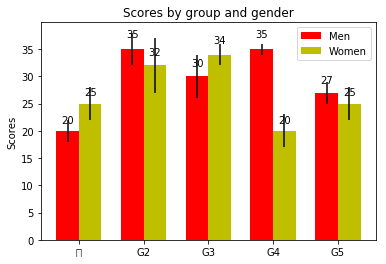

🏧


In [23]:
import numpy as np
import matplotlib.pyplot as plt

N = 5
men_means = (20, 35, 30, 35, 27)
men_std = (2, 3, 4, 1, 2)

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, men_means, width, color='r', yerr=men_std)

women_means = (25, 32, 34, 20, 25)
women_std = (3, 5, 2, 3, 3)
rects2 = ax.bar(ind + width, women_means, width, color='y', yerr=women_std)

# add some text for labels, title and axes ticks
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(ind + width / 2)
emo = emoji.EMOJI_UNICODE[':ATM_sign:']
ax.set_xticklabels((emo, 'G2', 'G3', 'G4', 'G5'))

ax.legend((rects1[0], rects2[0]), ('Men', 'Women'))


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()
print(emo)